# NFL Data EDA
___
The objectives of this notebook are as follows:
- Perform initial exploratory data analysis to identify unique storylines and insights
- Engineer new features that will be useful for the above goal in addition to modeling (our next stage)
- Visualize the data to draw out valuable perspective and illustration

## Halfway Check-In
We are now at the end of Week 8 of 2018 season, marking the halfway point for the regular season. Now seems like a good time to dig into some season-long trends and see what we can feel comfortable using moving forward.

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [74]:
qbs = pd.read_csv('./data/qb_stats_2018.csv', index_col='Unnamed: 0')
qbs.head()

,player,pass_comp,pass_att,pass_pct,pass_yds,yds_per_att,pass_TD,pass_INT,sacks_taken,rush_att,rush_yds,rush_TD,fumbles_lost,active,fpoints,fpoints_g,own_pct,week,team
0,Aaron Rodgers,20.0,30.0,66.7,286.0,9.5,3.0,0.0,2.0,1.0,15.0,0.0,0.0,1.0,24.9,24.9,100.0,1,GB
1,Alex Smith,21.0,30.0,70.0,255.0,8.5,2.0,0.0,3.0,8.0,14.0,0.0,0.0,1.0,19.6,19.6,48.3,1,WAS
2,Ben Roethlisberger,23.0,41.0,56.1,335.0,8.2,1.0,3.0,4.0,3.0,16.0,0.0,2.0,1.0,9.0,9.0,93.7,1,PIT
3,Brett Ratliff,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,TEN
4,Brian Brohm,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,BUF


In [75]:
# Let's make sure to only look at "active" players aka `active == 1.0`
qbs = qbs.loc[qbs.active==1.0, :]

In [76]:
qbs.groupby('player')['fpoints'].mean().sort_values(ascending=False)[:12]

player
Patrick Mahomes       27.271429
Ryan Fitzpatrick      25.100000
Matt Ryan             24.314286
Drew Brees            23.716667
Cam Newton            23.466667
Mitch Trubisky        22.700000
Aaron Rodgers         22.150000
Ben Roethlisberger    21.600000
Andrew Luck           21.214286
Philip Rivers         20.885714
Kirk Cousins          20.614286
Jared Goff            19.814286
Name: fpoints, dtype: float64

#### Our Top 12 features some familiar names from past seasons as well as newcomers:
- Patrick Mahomes
- Jared Goff
- Mitch Trubisky

In [77]:
# Looking at the QBs with the greatest variance
list(qbs.groupby('player')['fpoints'].std().sort_values(ascending=False)[:12].index)

['Ryan Fitzpatrick',
 'Mitch Trubisky',
 'Jameis Winston',
 'Drew Brees',
 'Matt Ryan',
 'Blake Bortles',
 'Marcus Mariota',
 'Tyrod Taylor',
 'Jared Goff',
 'Ben Roethlisberger',
 'Brock Osweiler',
 'Ryan Tannehill']

In [78]:
list(set(list(qbs.groupby('player')['fpoints'].mean().sort_values(ascending=False)[:12].index)).intersection(list(qbs.groupby('player')['fpoints'].std().sort_values(ascending=False)[:12].index)))


['Mitch Trubisky',
 'Drew Brees',
 'Jared Goff',
 'Matt Ryan',
 'Ryan Fitzpatrick',
 'Ben Roethlisberger']

So out of our Top 12 QBs, **Trubisky, Brees, Goff, Ryan, FitzMagic, and Roethlisberger** all also rank within the Top 12 of QBs with the highest amount of variance in there performance.

In [79]:
# So if performance AND consistency is what you're looking in your QB, go after one of these Top 6 guys for ROS
good_consistent_qbs = list(set(list(qbs.groupby('player')['fpoints'].mean().sort_values(ascending=False)[:12].index)).difference(list(qbs.groupby('player')['fpoints'].std().sort_values(ascending=False)[:12].index)))
good_consistent_qbs

['Patrick Mahomes',
 'Andrew Luck',
 'Cam Newton',
 'Aaron Rodgers',
 'Philip Rivers',
 'Kirk Cousins']

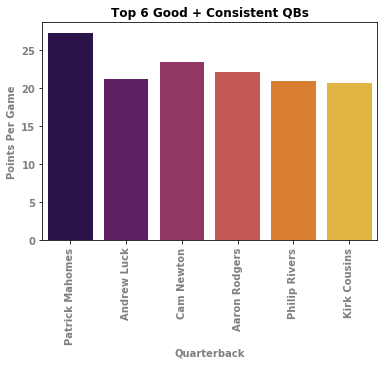

In [80]:
sns.barplot(x= qbs.groupby('player')['fpoints'].mean().sort_values(ascending=False)[good_consistent_qbs].index, y=qbs.groupby('player')['fpoints'].mean().sort_values(ascending=False)[good_consistent_qbs].values,
           palette= 'inferno')
plt.xticks(rotation=90, weight='bold', color= 'grey')
plt.xlabel('Quarterback', weight='bold', color = 'grey')
plt.yticks(weight='bold', color= 'grey')
plt.ylabel('Points Per Game', weight='bold', color = 'grey')
plt.title("Top 6 Good + Consistent QBs", weight = 'bold');
